# Dynamic Averaging with SVD and Loss Results

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)

%matplotlib inline

## Helpers

In [76]:
def performance_pivot(df, query, value, columns=None, xlabel=None):
    avg_piv = (
        df.query(query + ' and COMM_PERIOD > 1')
        .pivot_table(values=value, index="N_WORKERS", columns=['COMM_PERIOD'])
    )
    piv = (
        df.query(query + ' and COMM_PERIOD < 2 and N_WORKERS < 64')
        .pivot_table(values=value, index="N_WORKERS", columns=['COMM_MODE'])
    )
    merged = pd.concat([piv, avg_piv], axis=1)
    if columns is not None:
        merged.columns = columns
    if xlabel is not None:
        merged.index.name = xlabel
    
    return merged

In [77]:
columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
xlabel = 'No. of clients'

## Performance analysis for DynAvg SVD and DynAvg Loss

### Mnist

In [2]:
mnist_fed = pd.read_csv("../data/output/mnist-pkt-size.csv")
# mnist_avg = pd.read_csv("../data/output/mnist-avg.csv")

In [17]:
mnist_fed.head()

,N_WORKERS,COMM_PERIOD,AGG_MODE,COMM_MODE,NONIID,UNBALANCED,TIME,ACCURACY,PKT_SIZE,OVERLAP
0,16,1,0,0,0,0,53.428523,90.52,44.968,0.0
1,16,1,0,0,0,1,56.661802,90.55,44.968,0.0
2,16,1,0,0,1,0,62.546713,87.87,44.968,0.0
3,16,1,0,0,1,1,80.243772,79.60,44.968,0.0
4,16,1,0,1,0,0,48.823966,90.28,18.707,0.0


In [4]:
# mnist_avg.head()

#### IID and balanced

##### Time

In [84]:
ib_query = 'AGG_MODE == 1 and NONIID == 0 and UNBALANCED == 0'
t_ib_merged = performance_pivot(mnist_fed, ib_query, 'TIME', columns=columns, xlabel=xlabel)
t_ib_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,80.815287,81.006431,80.554017,67.467648,67.877507,66.717027,67.274951
16,57.127120,50.133118,50.448137,40.679561,40.095585,38.484602,38.897185
32,46.617638,39.494684,45.936536,26.629159,24.917492,22.994617,23.790363


##### Accuracy

In [85]:
acc_ib_merged = performance_pivot(mnist_fed, ib_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_ib_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,91.26,91.00,90.79,91.26,91.28,91.28,91.30
16,90.52,90.27,90.24,90.57,90.52,90.47,90.41
32,89.58,89.58,89.65,89.56,89.53,89.49,89.39


In [75]:
# ax = acc_ib_merged_piv.plot(figsize=(12, 8))
# ax.set_ylabel('Wall time (s)', fontdict=dict(fontsize=12))
# ax.set_xlabel('No. of workers', fontdict=dict(fontsize=12))

#### Non-IID and Balanced

In [83]:
nb_query = 'AGG_MODE == 1 and NONIID == 1 and UNBALANCED == 0'

###### Time

In [86]:
t_nb_merged = performance_pivot(mnist_fed, nb_query, 'TIME', columns=columns, xlabel=xlabel)
t_nb_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,80.813955,79.796200,80.704801,68.998640,66.873468,67.162615,67.016227
16,63.911056,51.603631,49.382810,41.087607,39.429280,38.862249,38.962291
32,37.923562,35.079787,39.503238,26.635280,24.091703,23.186415,23.802081


##### Accuracy

In [31]:
acc_nb_avg_piv = (
    mnist_fed.query(
        'AGG_MODE == 1 and NONIID == 1 and UNBALANCED == 0 and COMM_PERIOD > 1')
    .pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_PERIOD'])
)
acc_nb_avg_piv

COMM_PERIOD,10,20,50,100
N_WORKERS,,,,
8,72.78,63.32,52.69,50.80
16,76.31,68.81,55.76,46.47
32,82.60,80.53,76.47,68.50


In [32]:
# cols = [
#     r'FedAvg, $\rho=1$',
#     r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
#     r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
# ]
# index = [8, 32, 64, 128]
# acc_nb_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)

# acc_nb_avg_piv

In [34]:
acc_nb_piv = (
    mnist_fed.query('AGG_MODE == 1 and NONIID == 1 and UNBALANCED == 0 and N_WORKERS < 64')
    .pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_MODE'])
)
acc_nb_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,65.696,67.75,69.66
16,67.044,87.76,69.17
32,79.302,86.52,65.27


In [35]:
acc_nb_merged = pd.concat([acc_nb_piv, acc_nb_avg_piv], axis=1)
acc_nb_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
acc_nb_merged.index.name = 'No. of workers'

In [36]:
acc_nb_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of workers,,,,,,,
8,65.696,67.75,69.66,72.78,63.32,52.69,50.80
16,67.044,87.76,69.17,76.31,68.81,55.76,46.47
32,79.302,86.52,65.27,82.60,80.53,76.47,68.50


#### Non-IID and Unbalanced

##### Time

In [43]:
# cols = [
#     r'FedAvg, $\rho=1$',
#     r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
#     r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
# ]
# index = [8, 32, 64, 128]
# t_nu_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)
t_nu_avg_piv = (
    mnist_fed.query('AGG_MODE == 1 and NONIID == 1 and UNBALANCED == 1 and COMM_PERIOD > 1')
    .pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_PERIOD'])
)

In [44]:
t_nu_avg_piv

COMM_PERIOD,10,20,50,100
N_WORKERS,,,,
8,64.637299,65.949049,64.045047,63.523250
16,46.058805,43.968491,41.448274,43.581599
32,26.435445,23.364160,29.924172,24.822497


In [45]:
t_nu_piv = (
    mnist_fed.query(
        'AGG_MODE == 1 and NONIID == 1 and UNBALANCED == 1 and COMM_PERIOD < 2 and N_WORKERS < 64')
    .pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_MODE'])
)
t_nu_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,83.918575,89.366349,77.941389
16,76.451873,53.918258,54.606935
32,52.112128,44.123158,43.330673


In [46]:
t_nu_merged = pd.concat([t_nu_piv, t_nu_avg_piv], axis=1)
# For now adding DynAvgLoss column
# t_nu_merged.insert(2, 'DynAvg SVD', np.nan)
t_nu_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
t_nu_merged.index.name = 'No. of workers'

In [47]:
t_nu_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of workers,,,,,,,
8,83.918575,89.366349,77.941389,64.637299,65.949049,64.045047,63.523250
16,76.451873,53.918258,54.606935,46.058805,43.968491,41.448274,43.581599
32,52.112128,44.123158,43.330673,26.435445,23.364160,29.924172,24.822497


##### Accuracy

In [53]:
# cols = [
#     r'FedAvg, $\rho=1$',
#     r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
#     r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
# ]
# index = [8, 32, 64, 128]
# acc_nu_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)
acc_nu_avg_piv = (
    mnist_fed.query('AGG_MODE == 1 and NONIID == 1 and UNBALANCED == 1 and COMM_PERIOD > 1')
    .pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_PERIOD'])
)

In [54]:
acc_nu_piv = (
    mnist_fed.query(
        'AGG_MODE == 1 and NONIID == 1 and UNBALANCED == 1 and COMM_PERIOD < 2 and N_WORKERS < 64'
    )
    .pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_MODE'])
)
acc_nu_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,82.53,87.21,77.23
16,79.60,82.65,64.16
32,84.98,86.38,81.93


In [55]:
acc_nu_merged = pd.concat([acc_nu_piv, acc_nu_avg_piv], axis=1)
# For now adding DynAvgLoss column
# acc_nu_merged.insert(2, 'DynAvg SVD', np.nan)
acc_nu_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
acc_nu_merged.index.name = 'No. of workers'

In [56]:
acc_nu_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of workers,,,,,,,
8,82.53,87.21,77.23,73.14,67.72,54.65,45.85
16,79.60,82.65,64.16,59.57,51.56,46.21,43.63
32,84.98,86.38,81.93,58.76,47.93,34.36,30.22


#### IID and Unbalanced

##### Time

In [58]:
# cols = [
#     r'FedAvg, $\rho=1$',
#     r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
#     r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
# ]
# index = [8, 32, 64, 128]
# t_iu_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)
t_iu_avg_piv = (
    mnist_fed.query('AGG_MODE == 1 and NONIID == 0 and UNBALANCED == 1 and COMM_PERIOD > 1')
    .pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_PERIOD'])
)
t_iu_avg_piv

COMM_PERIOD,10,20,50,100
N_WORKERS,,,,
8,66.094950,64.454745,63.644001,63.234179
16,38.287164,38.795892,45.194709,45.536603
32,29.250908,23.857448,26.774717,25.520680


In [59]:
t_iu_piv = (
    mnist_fed.query(
        'AGG_MODE == 1 and NONIID == 0 and UNBALANCED == 1 and COMM_PERIOD < 2 and N_WORKERS < 64'
    )
    .pivot_table(values="TIME", index="N_WORKERS", columns=['COMM_MODE'])
)
t_iu_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,82.719007,79.507657,80.846795
16,75.666846,66.726292,50.744187
32,53.883996,45.876370,NaN


In [60]:
t_iu_merged = pd.concat([t_iu_piv, t_iu_avg_piv], axis=1)
t_iu_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
t_iu_merged.index.name = 'No. of workers'

In [61]:
t_iu_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of workers,,,,,,,
8,82.719007,79.507657,80.846795,66.094950,64.454745,63.644001,63.234179
16,75.666846,66.726292,50.744187,38.287164,38.795892,45.194709,45.536603
32,53.883996,45.876370,NaN,29.250908,23.857448,26.774717,25.520680


##### Accuracy

In [63]:
# cols = [
#     r'FedAvg, $\rho=1$',
#     r'FedAvg, $\rho=10$', r'FedAvg, $\rho=20$',
#     r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
# ]
# index = [8, 32, 64, 128]
# acc_iu_avg_piv = pd.DataFrame(np.tile(np.nan, (4, 5)), index=index, columns=cols)
acc_iu_avg_piv = (
    mnist_fed.query('AGG_MODE == 1 and NONIID == 0 and UNBALANCED == 1 and COMM_PERIOD > 1')
    .pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_PERIOD'])
)
acc_iu_avg_piv

COMM_PERIOD,10,20,50,100
N_WORKERS,,,,
8,91.32,91.24,91.13,90.96
16,90.53,90.47,90.39,90.06
32,89.54,89.53,89.45,89.18


In [64]:
acc_iu_piv = (
    mnist_fed.query(
        'AGG_MODE == 1 and NONIID == 0 and UNBALANCED == 1 and COMM_PERIOD < 2 and N_WORKERS < 64'
    )
    .pivot_table(values="ACCURACY", index="N_WORKERS", columns=['COMM_MODE'])
)
acc_iu_piv

COMM_MODE,0,1,2
N_WORKERS,,,
8,91.25,91.39,91.47
16,90.55,90.86,89.00
32,89.57,90.02,NaN


In [65]:
acc_iu_merged = pd.concat([acc_iu_piv, acc_iu_avg_piv], axis=1)
acc_iu_merged.columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
acc_iu_merged.index.name = 'No. of workers'

In [66]:
acc_iu_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of workers,,,,,,,
8,91.25,91.39,91.47,91.32,91.24,91.13,90.96
16,90.55,90.86,89.00,90.53,90.47,90.39,90.06
32,89.57,90.02,NaN,89.54,89.53,89.45,89.18


### Wall time analysis

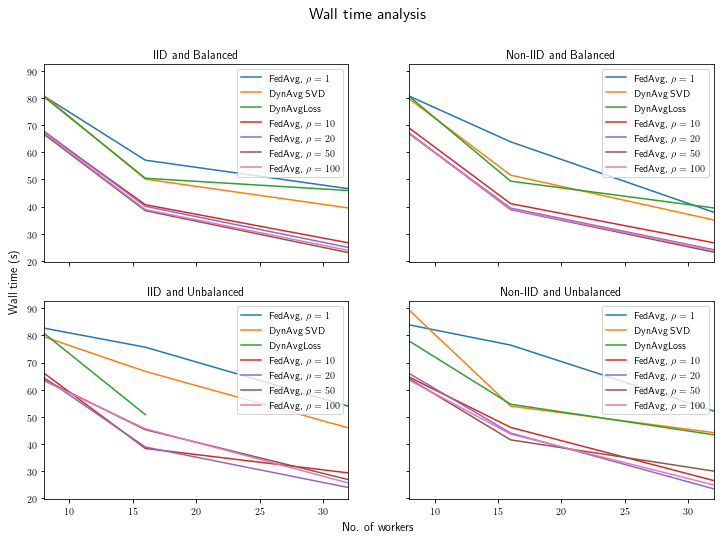

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# IID and Balanced
t_ib_merged.plot(ax=axes[0, 0])
# axes[0, 0].set_ylabel('Wall time (s)', fontdict=dict(fontsize=12))
axes[0, 0].set_title('IID and Balanced')

# Non IID and Balanced
t_nb_merged.plot(ax=axes[0, 1])
axes[0, 1].set_title('Non-IID and Balanced')

# IID and Unbalanced
t_iu_merged.plot(ax=axes[1, 0])
axes[1, 0].set_title('IID and Unbalanced')
axes[1, 0].set_xlabel('')

# Non IID and Unbalanced
t_nu_merged.plot(ax=axes[1, 1])
axes[1, 1].set_title('Non-IID and Unbalanced')
axes[1, 1].set_xlabel('')

plt.ylabel('Wall time (s)', fontdict=dict(fontsize=12))
plt.xlabel('No. of workers', fontdict=dict(fontsize=12))
plt.suptitle('Wall time analysis', fontsize=16)
plt.savefig('../reports/figures/time-analysis.png', dpi=500, format='png')

### Accuracy analysis

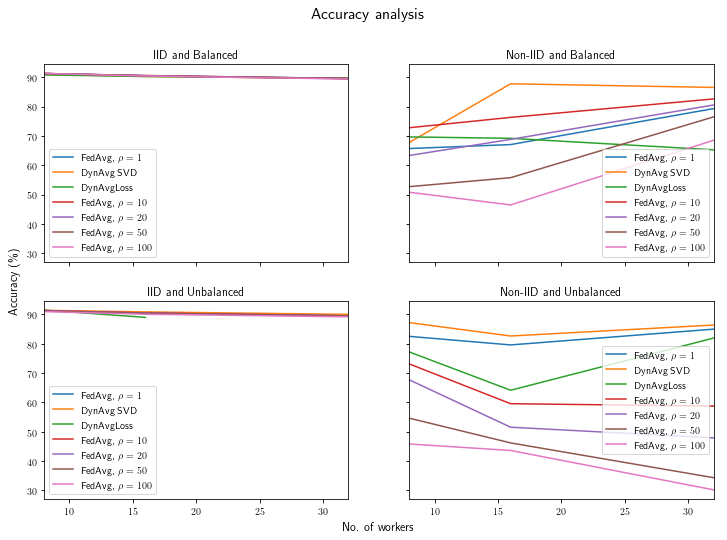

In [68]:
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
# add a big axes, hide frame
fig2.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

# IID and balanced
acc_ib_merged_piv.plot(ax=axes2[0, 0])
axes2[0, 0].set_title('IID and Balanced')

# Non-IID and balanced
acc_nb_merged.plot(ax=axes2[0, 1])
axes2[0, 1].set_title('Non-IID and Balanced')

# IID and Unbalanced
acc_iu_merged.plot(ax=axes2[1, 0])
axes2[1, 0].set_title('IID and Unbalanced')
axes2[1, 0].set_xlabel('')

# Non-IID and Unbalanced
acc_nu_merged.plot(ax=axes2[1, 1])
axes2[1, 1].set_title('Non-IID and Unbalanced')
axes2[1, 1].set_xlabel('')

plt.ylabel('Accuracy (\%)', fontdict=dict(fontsize=12))
plt.xlabel('No. of workers', fontdict=dict(fontsize=12))
plt.suptitle(r'Accuracy analysis', fontsize=16)
plt.savefig('../reports/figures/accuracy-analysis.png', dpi=500, format='png')